### Hometask 1

In [45]:
import os 
os.environ['CUDA_VISIBLE_DEVICES'] = '-1'

In [46]:
from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words=10000)

word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])
decoded_review = ' '.join(
    [reverse_word_index.get(i - 3, '?') for i in train_data[0]])


In [47]:
word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])
decoded_review = ' '.join(
    [reverse_word_index.get(i - 3, '?') for i in train_data[0]])


import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)


In [48]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

### 1 hidden layer

In [49]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(1, activation='sigmoid'))

### 2 hidden layers

In [23]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

### 3 hidden layers 

In [24]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [50]:

from keras import losses
from keras import metrics
from keras import optimizers

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss=losses.binary_crossentropy,
              metrics=[metrics.binary_accuracy])

In [51]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [52]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 4s 289us/step - loss: 0.4923 - acc: 0.7857 - val_loss: 0.3722 - val_acc: 0.8700
Epoch 2/20
15000/15000 [==============================] - 3s 216us/step - loss: 0.2972 - acc: 0.9077 - val_loss: 0.3098 - val_acc: 0.8870
Epoch 3/20
15000/15000 [==============================] - 4s 242us/step - loss: 0.2274 - acc: 0.9288 - val_loss: 0.3042 - val_acc: 0.8776
Epoch 4/20
15000/15000 [==============================] - 3s 227us/step - loss: 0.1890 - acc: 0.9403 - val_loss: 0.2873 - val_acc: 0.8845
Epoch 5/20
15000/15000 [==============================] - 3s 213us/step - loss: 0.1598 - acc: 0.9523 - val_loss: 0.2769 - val_acc: 0.8889
Epoch 6/20
15000/15000 [==============================] - 3s 232us/step - loss: 0.1376 - acc: 0.9603 - val_loss: 0.2985 - val_acc: 0.8815
Epoch 7/20
15000/15000 [==============================] - 3s 230us/step - loss: 0.1196 - acc: 0.9663 - val_loss: 0.2874 - 

In [53]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

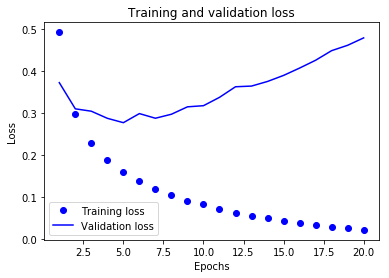

In [54]:
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(history_dict['acc']) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

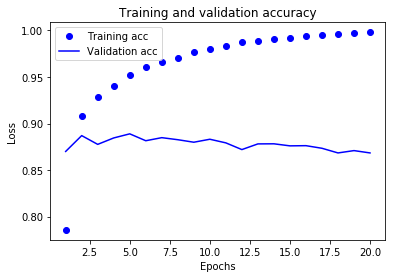

In [55]:
plt.clf()
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

### 2 hidden layers (32 units)

In [58]:
model = models.Sequential()
model.add(layers.Dense(32, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
25000/25000 [==============================] - 5s 199us/step - loss: 0.4429 - acc: 0.8135
Epoch 2/4
25000/25000 [==============================] - 4s 150us/step - loss: 0.2490 - acc: 0.9108
Epoch 3/4
25000/25000 [==============================] - 4s 157us/step - loss: 0.1910 - acc: 0.9304
Epoch 4/4
25000/25000 [==============================] - 5s 183us/step


### 2 hidden layers (64 units)

In [59]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
25000/25000 [==============================] - 6s 237us/step - loss: 0.4260 - acc: 0.8092 3s - loss: 0.5122 -  - ETA: 1s - loss: 0.468
Epoch 2/4
25000/25000 [==============================] - 5s 189us/step - loss: 0.2362 - acc: 0.9109
Epoch 3/4
25000/25000 [==============================] - 4s 174us/step - loss: 0.1826 - acc: 0.9304
Epoch 4/4
25000/25000 [==============================] - 5s 192us/step


### 2 hidden layers (128 units)  

In [60]:
model = models.Sequential()
model.add(layers.Dense(128, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
25000/25000 [==============================] - 7s 277us/step - loss: 0.4259 - acc: 0.8096
Epoch 2/4
25000/25000 [==============================] - 6s 251us/step - loss: 0.2366 - acc: 0.9062
Epoch 3/4
25000/25000 [==============================] - 6s 258us/step - loss: 0.1672 - acc: 0.9370
Epoch 4/4
25000/25000 [==============================] - 7s 268us/step


### MSE

In [61]:
model = models.Sequential()
model.add(layers.Dense(32, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='mse',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
25000/25000 [==============================] - 5s 194us/step - loss: 0.1400 - acc: 0.8198
Epoch 2/4
25000/25000 [==============================] - 4s 172us/step - loss: 0.0736 - acc: 0.9104
Epoch 3/4
25000/25000 [==============================] - 4s 163us/step - loss: 0.0550 - acc: 0.9318
Epoch 4/4
25000/25000 [==============================] - 4s 179us/step


### TANH

In [63]:
model = models.Sequential()
model.add(layers.Dense(32, activation='tanh', input_shape=(10000,)))
model.add(layers.Dense(32, activation='tanh'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='mse',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
25000/25000 [==============================] - 5s 188us/step - loss: 0.1287 - acc: 0.8274
Epoch 2/4
25000/25000 [==============================] - 4s 151us/step - loss: 0.0645 - acc: 0.9164
Epoch 3/4
25000/25000 [==============================] - 4s 162us/step - loss: 0.0515 - acc: 0.9342
Epoch 4/4
25000/25000 [==============================] - 4s 177us/step


### Hometask 2

In [124]:
from keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(
    num_words=10000)

In [125]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)


In [126]:
from keras.utils.np_utils import to_categorical

y_train = np.array(train_labels)
y_test = np.array(test_labels)

In [127]:
model.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

### 1 hidden layer

In [128]:
model = models.Sequential()
model.add(layers.Dense(32, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(partial_x_train,
          partial_y_train,
          epochs=20,
          batch_size=128,
          validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 5s 352us/step - loss: 0.6645 - acc: 0.8210 - val_loss: 0.3221 - val_acc: 0.8746
Epoch 2/20
15000/15000 [==============================] - 4s 294us/step - loss: 0.2383 - acc: 0.9149 - val_loss: 0.2869 - val_acc: 0.8845
Epoch 3/20
15000/15000 [==============================] - 4s 290us/step - loss: 0.1771 - acc: 0.9373 - val_loss: 0.2939 - val_acc: 0.8843
Epoch 4/20
15000/15000 [==============================] - 4s 289us/step - loss: 0.1381 - acc: 0.9534 - val_loss: 0.2886 - val_acc: 0.8875
Epoch 5/20
15000/15000 [==============================] - 4s 288us/step - loss: 0.1101 - acc: 0.9633 - val_loss: 0.3097 - val_acc: 0.8829
Epoch 6/20
15000/15000 [==============================] - 4s 279us/step - loss: 0.0872 - acc: 0.9719 - val_loss: 0.3541 - val_acc: 0.8767
Epoch 7/20
15000/15000 [==============================] - 4s 291us/step - loss: 0.0671 - acc: 0.9784 - val_loss: 0.3746 - 

### 2 hidden layers (32 units)

In [129]:
model = models.Sequential()
model.add(layers.Dense(32, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(partial_x_train,
          partial_y_train,
          epochs=20,
          batch_size=128,
          validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 5s 355us/step - loss: 0.7098 - acc: 0.8035 - val_loss: 0.3973 - val_acc: 0.8288
Epoch 2/20
15000/15000 [==============================] - 4s 267us/step - loss: 0.2340 - acc: 0.9148 - val_loss: 0.3401 - val_acc: 0.8614
Epoch 3/20
15000/15000 [==============================] - 4s 278us/step - loss: 0.1653 - acc: 0.9379 - val_loss: 0.3554 - val_acc: 0.8673
Epoch 4/20
15000/15000 [==============================] - 4s 286us/step - loss: 0.1289 - acc: 0.9539 - val_loss: 0.3200 - val_acc: 0.8867
Epoch 5/20
15000/15000 [==============================] - 4s 273us/step - loss: 0.0972 - acc: 0.9658 - val_loss: 0.3768 - val_acc: 0.8766
Epoch 6/20
15000/15000 [==============================] - 4s 275us/step - loss: 0.0722 - acc: 0.9755 - val_loss: 0.4256 - val_acc: 0.8769
Epoch 7/20
15000/15000 [==============================] - 4s 274us/step - loss: 0.0505 - acc: 0.9829 - val_loss: 0.5046 - 

### 2 hidden layers (64 units)

In [130]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(partial_x_train,
          partial_y_train,
          epochs=20,
          batch_size=128,
          validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 6s 404us/step - loss: 0.5732 - acc: 0.8119 - val_loss: 0.3036 - val_acc: 0.8745
Epoch 2/20
15000/15000 [==============================] - 5s 320us/step - loss: 0.2204 - acc: 0.9154 - val_loss: 0.4091 - val_acc: 0.8388
Epoch 3/20
15000/15000 [==============================] - 5s 328us/step - loss: 0.1585 - acc: 0.9400 - val_loss: 0.3457 - val_acc: 0.8753
Epoch 4/20
15000/15000 [==============================] - 5s 347us/step - loss: 0.1065 - acc: 0.9597 - val_loss: 0.5278 - val_acc: 0.8352
Epoch 5/20
15000/15000 [==============================] - 5s 322us/step - loss: 0.0719 - acc: 0.9737 - val_loss: 0.4338 - val_acc: 0.8773
Epoch 6/20
15000/15000 [==============================] - 5s 352us/step - loss: 0.0405 - acc: 0.9851 - val_loss: 0.5798 - val_acc: 0.8738
Epoch 7/20
15000/15000 [==============================] - 6s 371us/step - loss: 0.0239 - acc: 0.9918 - val_loss: 0.6376 - 

### 2 hidden layers (128 units)

In [131]:
model = models.Sequential()
model.add(layers.Dense(128, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(partial_x_train,
          partial_y_train,
          epochs=20,
          batch_size=128,
          validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 9s 584us/step - loss: 0.5050 - acc: 0.8051 - val_loss: 0.3274 - val_acc: 0.8685
Epoch 2/20
15000/15000 [==============================] - 7s 487us/step - loss: 0.2088 - acc: 0.9181 - val_loss: 0.3214 - val_acc: 0.8776
Epoch 3/20
15000/15000 [==============================] - 7s 481us/step - loss: 0.1326 - acc: 0.9480 - val_loss: 0.3396 - val_acc: 0.8810
Epoch 4/20
15000/15000 [==============================] - 7s 471us/step - loss: 0.0692 - acc: 0.9727 - val_loss: 0.4280 - val_acc: 0.8772
Epoch 5/20
15000/15000 [==============================] - 7s 471us/step - loss: 0.0292 - acc: 0.9902 - val_loss: 0.6511 - val_acc: 0.8536
Epoch 6/20
15000/15000 [==============================] - 7s 480us/step - loss: 0.0146 - acc: 0.9970 - val_loss: 0.7303 - val_acc: 0.8751
Epoch 7/20
15000/15000 [==============================] - 7s 483us/step - loss: 0.0101 - acc: 0.9983 - val_loss: 1.0962 - 

### 3 hidden layers 

In [132]:
model = models.Sequential()
model.add(layers.Dense(32, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(partial_x_train,
          partial_y_train,
          epochs=20,
          batch_size=128,
          validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 9s 594us/step - loss: 0.8574 - acc: 0.7508 - val_loss: 0.3179 - val_acc: 0.8795
Epoch 2/20
15000/15000 [==============================] - 5s 325us/step - loss: 0.2438 - acc: 0.9055 - val_loss: 0.3075 - val_acc: 0.8796
Epoch 3/20
15000/15000 [==============================] - 5s 317us/step - loss: 0.1747 - acc: 0.9344 - val_loss: 0.3431 - val_acc: 0.8709
Epoch 4/20
15000/15000 [==============================] - 4s 298us/step - loss: 0.1299 - acc: 0.9512 - val_loss: 0.4155 - val_acc: 0.8636
Epoch 5/20
15000/15000 [==============================] - 4s 278us/step - loss: 0.0972 - acc: 0.9647 - val_loss: 0.4171 - val_acc: 0.8725
Epoch 6/20
15000/15000 [==============================] - 4s 295us/step - loss: 0.0691 - acc: 0.9755 - val_loss: 0.4610 - val_acc: 0.8725
Epoch 7/20
15000/15000 [==============================] - 4s 286us/step - loss: 0.0449 - acc: 0.9838 - val_loss: 0.5459 - 